In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from  matplotlib.colors import LogNorm
from math import *
import pandas as pd
from scipy.interpolate import interp1d

In [10]:
dof2 = np.genfromtxt("DOF1cwt.csv", delimiter=",", dtype=float)
fresp = np.genfromtxt("freq1DOF.csv", delimiter=",", dtype=float)

In [11]:
f0 = 0.8 # initial frequency (Hz)
fend = 3 # final frequency (Hz)
fs = 20*fend # sampling frequency
Npoint=len(dof2[0])
Tsimul=(Npoint-1)/fs
t=1/fs
exc_finst = np.linspace(f0, fend, Npoint) # instantaneous excitation frequency
T=np.linspace(0,t*(Npoint-1),Npoint)
fnorm = np.linspace(0, 10, 200) # Vector of frequency ratios

In [12]:
plt.pcolormesh(T,fresp,dof2,norm=LogNorm(vmin=np.min(dof2),vmax=np.max(dof2)))
plt.colorbar()

C:\Users\linab\AppData\Local\Temp/ipykernel_11452/2449048721.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(T,fresp,dof2,norm=LogNorm(vmin=np.min(dof2),vmax=np.max(dof2)))


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 432x288 with 2 Axes>

In [14]:
fnorm = np.linspace(0, 10, 200) # Vector of frequency ratios
wt_amp_scaled = np.zeros((len(fnorm),Npoint))
for i in range(Npoint):
  fscaled = (fresp/exc_finst[i]).reshape(len(dof2))
  scaling = interp1d(fscaled, dof2[:,i], kind='linear', bounds_error=False, fill_value=np.percentile(dof2[:,i], 5))
  wt_amp_scaled[:,i]=scaling(fnorm)

C:\Users\linab\AppData\Local\Temp/ipykernel_11452/767534677.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(T,fnorm,wt_amp_scaled,norm=LogNorm(vmin=np.min(wt_amp_scaled),vmax=np.max(wt_amp_scaled)))


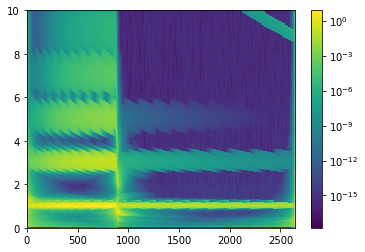

In [15]:
plt.pcolormesh(T,fnorm,wt_amp_scaled,norm=LogNorm(vmin=np.min(wt_amp_scaled),vmax=np.max(wt_amp_scaled)))
plt.colorbar()

In [18]:
'''Norm n'''
n = 2
wt_amp_scaled2 = np.zeros(np.shape(wt_amp_scaled))
for i in range(Npoint):
  normn=np.sum(wt_amp_scaled[:,i]**n)**(1/n)
  wt_amp_scaled2[:,i] = wt_amp_scaled[:,i] / normn

plt.pcolormesh(T,fnorm,wt_amp_scaled2, norm=LogNorm(vmin=np.min(wt_amp_scaled2),vmax=np.max(wt_amp_scaled2)))
plt.colorbar()

In [16]:
'''Norm around 1'''
wt_amp_scaled3 = np.zeros(np.shape(wt_amp_scaled))
for i in range(Npoint):
  norm=np.sum(wt_amp_scaled[17:28,i])/5
  wt_amp_scaled3[:,i] = wt_amp_scaled[:,i] / norm

C:\Users\linab\AppData\Local\Temp/ipykernel_11452/1142225794.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(T,fnorm,wt_amp_scaled3,norm=LogNorm(vmin=np.min(wt_amp_scaled3),vmax=np.max(wt_amp_scaled3)))


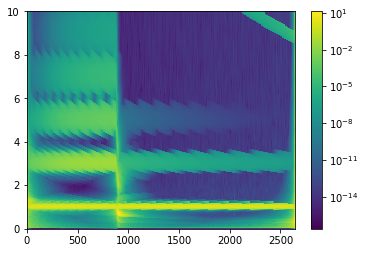

In [17]:
plt.pcolormesh(T,fnorm,wt_amp_scaled3,norm=LogNorm(vmin=np.min(wt_amp_scaled3),vmax=np.max(wt_amp_scaled3)))
plt.colorbar()

C:\Users\linab\AppData\Local\Temp/ipykernel_3700/639277500.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(T,fnorm,wt_amp_scaled3,vmin=0,vmax=1)


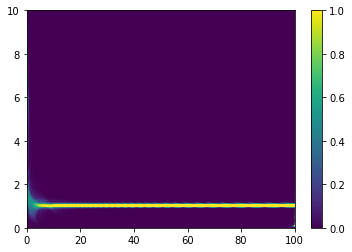

In [ ]:
#plt.pcolormesh(T,fnorm,wt_amp_scaled3)
plt.pcolormesh(T,fnorm,wt_amp_scaled3,vmin=0,vmax=1)
plt.colorbar()